In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### 1. Defining the problem statement

### To analyze customer purchase behavior also want to see how different genders make decisions in purchasing (black friday) centric.

In [2]:
df = pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### Observations on shape of data, data types of all the attributes

In [3]:
df.shape

(550068, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### Non-Graphical Analysis and Graphical Analysis

M    414259
F    135809
Name: Gender, dtype: int64


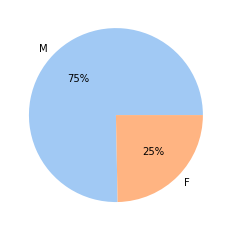

In [20]:
print(df['Gender'].value_counts())
colors = sns.color_palette('pastel')[0:len(df['Gender'].value_counts())]
plt.pie(df['Gender'].value_counts(),labels = df['Gender'].value_counts().index.tolist(),colors = colors, autopct='%.0f%%')
plt.show()
## A significant majority of male customers compared to female customers (75%-25%)

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


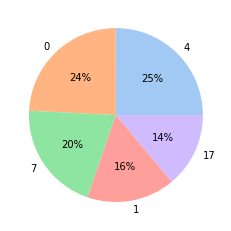

In [70]:
print(df['Occupation'].value_counts())
colors = sns.color_palette('pastel')[0:len(df['Occupation'].value_counts().head())]
plt.pie(df['Occupation'].value_counts().head(),labels = df['Occupation'].value_counts().head().index.tolist(),colors = colors, autopct='%.0f%%')
plt.show()
## From this we can visualize the most Job experience Walmart customers
## We can also see 24% being at 0. Could be unemployed or fresher/students

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


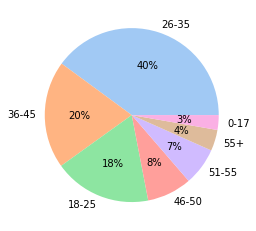

In [21]:
print(df['Age'].value_counts())
colors = sns.color_palette('pastel')[0:len(df['Age'].value_counts())]
plt.pie(df['Age'].value_counts(),labels = df['Age'].value_counts().index.tolist(),colors = colors, autopct='%.0f%%')
plt.show()
## the 26-35 age bucket is the prominent bucket in terms of their customers

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


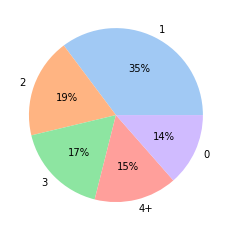

In [22]:
print(df['Stay_In_Current_City_Years'].value_counts())
colors = sns.color_palette('pastel')[0:len(df['Stay_In_Current_City_Years'].value_counts())]
plt.pie(df['Stay_In_Current_City_Years'].value_counts(),labels = df['Stay_In_Current_City_Years'].value_counts().index.tolist(),colors = colors, autopct='%.0f%%')
plt.show()
## Majority of the customers are in the city from a year only. With 14% being new-comers to the city

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


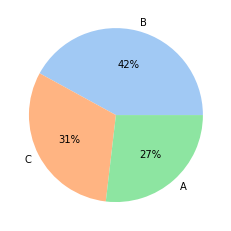

In [23]:
print(df['City_Category'].value_counts())
colors = sns.color_palette('pastel')[0:len(df['City_Category'].value_counts())]
plt.pie(df['City_Category'].value_counts(),labels = df['City_Category'].value_counts().index.tolist(),colors = colors, autopct='%.0f%%')
plt.show()

## Around half of the customers are from 'B' category in the city 

0    324731
1    225337
Name: Marital_Status, dtype: int64


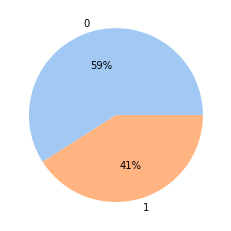

In [24]:
print(df['Marital_Status'].value_counts())
colors = sns.color_palette('pastel')[0:len(df['Marital_Status'].value_counts())]
plt.pie(df['Marital_Status'].value_counts(),labels = df['Marital_Status'].value_counts().index.tolist(),colors = colors, autopct='%.0f%%')
plt.show()

## We cant understand using 0s and 1s so we will categorize

#### Changing Marital_status values 0's as Single and 1's as Married

Single               324731
Partnered/Married    225337
Name: Marital_Status, dtype: int64


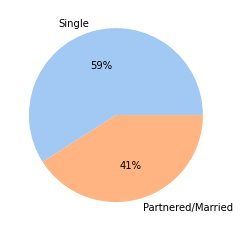

In [27]:
df['Marital_Status'].replace({0: "Single", 1: "Partnered/Married"}, inplace=True)
print(df['Marital_Status'].value_counts())
colors = sns.color_palette('pastel')[0:len(df['Marital_Status'].value_counts())]
plt.pie(df['Marital_Status'].value_counts(),labels = df['Marital_Status'].value_counts().index.tolist(),colors = colors, autopct='%.0f%%')
plt.show()
## I have categorized 0's as Single and 1's as married, we can see that 59% people are singles whereas 41% are partnered who shop at walmart

### Outlier detection (boxplot)

4153 Outliers present for Product_Category variable 

Outliers for Product_Category:
545915    20
Name: Product_Category, dtype: int64
545916    20
Name: Product_Category, dtype: int64
545917    20
Name: Product_Category, dtype: int64
545918    20
Name: Product_Category, dtype: int64
545919    20
Name: Product_Category, dtype: int64
545920    19
Name: Product_Category, dtype: int64
545921    20
Name: Product_Category, dtype: int64
545922    19
Name: Product_Category, dtype: int64
545923    20
Name: Product_Category, dtype: int64
545924    20
Name: Product_Category, dtype: int64
545925    19
Name: Product_Category, dtype: int64
545926    20
Name: Product_Category, dtype: int64
545927    20
Name: Product_Category, dtype: int64
545928    20
Name: Product_Category, dtype: int64
545929    20
Name: Product_Category, dtype: int64
545930    20
Name: Product_Category, dtype: int64
545931    19
Name: Product_Category, dtype: int64
545932    20
Name: Product_Category, dtype: int64
545933    20
Na

Name: Product_Category, dtype: int64
546193    20
Name: Product_Category, dtype: int64
546194    20
Name: Product_Category, dtype: int64
546195    20
Name: Product_Category, dtype: int64
546196    20
Name: Product_Category, dtype: int64
546197    20
Name: Product_Category, dtype: int64
546198    19
Name: Product_Category, dtype: int64
546199    20
Name: Product_Category, dtype: int64
546200    19
Name: Product_Category, dtype: int64
546201    20
Name: Product_Category, dtype: int64
546202    20
Name: Product_Category, dtype: int64
546203    19
Name: Product_Category, dtype: int64
546204    19
Name: Product_Category, dtype: int64
546205    20
Name: Product_Category, dtype: int64
546206    20
Name: Product_Category, dtype: int64
546207    20
Name: Product_Category, dtype: int64
546208    20
Name: Product_Category, dtype: int64
546209    20
Name: Product_Category, dtype: int64
546210    20
Name: Product_Category, dtype: int64
546211    20
Name: Product_Category, dtype: int64
546212    19


546469    20
Name: Product_Category, dtype: int64
546470    20
Name: Product_Category, dtype: int64
546471    20
Name: Product_Category, dtype: int64
546472    20
Name: Product_Category, dtype: int64
546473    20
Name: Product_Category, dtype: int64
546474    20
Name: Product_Category, dtype: int64
546475    20
Name: Product_Category, dtype: int64
546476    20
Name: Product_Category, dtype: int64
546477    20
Name: Product_Category, dtype: int64
546478    19
Name: Product_Category, dtype: int64
546479    20
Name: Product_Category, dtype: int64
546480    20
Name: Product_Category, dtype: int64
546481    19
Name: Product_Category, dtype: int64
546482    20
Name: Product_Category, dtype: int64
546483    20
Name: Product_Category, dtype: int64
546484    19
Name: Product_Category, dtype: int64
546485    20
Name: Product_Category, dtype: int64
546486    20
Name: Product_Category, dtype: int64
546487    19
Name: Product_Category, dtype: int64
546488    20
Name: Product_Category, dtype: int64


546752    20
Name: Product_Category, dtype: int64
546753    20
Name: Product_Category, dtype: int64
546754    20
Name: Product_Category, dtype: int64
546755    20
Name: Product_Category, dtype: int64
546756    20
Name: Product_Category, dtype: int64
546757    19
Name: Product_Category, dtype: int64
546758    19
Name: Product_Category, dtype: int64
546759    20
Name: Product_Category, dtype: int64
546760    19
Name: Product_Category, dtype: int64
546761    20
Name: Product_Category, dtype: int64
546762    19
Name: Product_Category, dtype: int64
546763    19
Name: Product_Category, dtype: int64
546764    20
Name: Product_Category, dtype: int64
546765    20
Name: Product_Category, dtype: int64
546766    20
Name: Product_Category, dtype: int64
546767    19
Name: Product_Category, dtype: int64
546768    19
Name: Product_Category, dtype: int64
546769    20
Name: Product_Category, dtype: int64
546770    20
Name: Product_Category, dtype: int64
546771    20
Name: Product_Category, dtype: int64


547035    19
Name: Product_Category, dtype: int64
547036    20
Name: Product_Category, dtype: int64
547037    20
Name: Product_Category, dtype: int64
547038    20
Name: Product_Category, dtype: int64
547039    20
Name: Product_Category, dtype: int64
547040    20
Name: Product_Category, dtype: int64
547041    20
Name: Product_Category, dtype: int64
547042    20
Name: Product_Category, dtype: int64
547043    19
Name: Product_Category, dtype: int64
547044    19
Name: Product_Category, dtype: int64
547045    19
Name: Product_Category, dtype: int64
547046    20
Name: Product_Category, dtype: int64
547047    20
Name: Product_Category, dtype: int64
547048    20
Name: Product_Category, dtype: int64
547049    19
Name: Product_Category, dtype: int64
547050    19
Name: Product_Category, dtype: int64
547051    19
Name: Product_Category, dtype: int64
547052    20
Name: Product_Category, dtype: int64
547053    20
Name: Product_Category, dtype: int64
547054    20
Name: Product_Category, dtype: int64


Name: Product_Category, dtype: int64
547318    19
Name: Product_Category, dtype: int64
547319    19
Name: Product_Category, dtype: int64
547320    19
Name: Product_Category, dtype: int64
547321    19
Name: Product_Category, dtype: int64
547322    19
Name: Product_Category, dtype: int64
547323    20
Name: Product_Category, dtype: int64
547324    20
Name: Product_Category, dtype: int64
547325    20
Name: Product_Category, dtype: int64
547326    19
Name: Product_Category, dtype: int64
547327    20
Name: Product_Category, dtype: int64
547328    19
Name: Product_Category, dtype: int64
547329    19
Name: Product_Category, dtype: int64
547330    20
Name: Product_Category, dtype: int64
547331    20
Name: Product_Category, dtype: int64
547332    20
Name: Product_Category, dtype: int64
547333    20
Name: Product_Category, dtype: int64
547334    19
Name: Product_Category, dtype: int64
547335    19
Name: Product_Category, dtype: int64
547336    19
Name: Product_Category, dtype: int64
547337    20


547590    20
Name: Product_Category, dtype: int64
547591    20
Name: Product_Category, dtype: int64
547592    20
Name: Product_Category, dtype: int64
547593    19
Name: Product_Category, dtype: int64
547594    19
Name: Product_Category, dtype: int64
547595    20
Name: Product_Category, dtype: int64
547596    20
Name: Product_Category, dtype: int64
547597    19
Name: Product_Category, dtype: int64
547598    20
Name: Product_Category, dtype: int64
547599    20
Name: Product_Category, dtype: int64
547600    20
Name: Product_Category, dtype: int64
547601    19
Name: Product_Category, dtype: int64
547602    20
Name: Product_Category, dtype: int64
547603    20
Name: Product_Category, dtype: int64
547604    20
Name: Product_Category, dtype: int64
547605    19
Name: Product_Category, dtype: int64
547606    20
Name: Product_Category, dtype: int64
547607    20
Name: Product_Category, dtype: int64
547608    19
Name: Product_Category, dtype: int64
547609    20
Name: Product_Category, dtype: int64


Name: Product_Category, dtype: int64
547860    19
Name: Product_Category, dtype: int64
547861    20
Name: Product_Category, dtype: int64
547862    19
Name: Product_Category, dtype: int64
547863    19
Name: Product_Category, dtype: int64
547864    19
Name: Product_Category, dtype: int64
547865    20
Name: Product_Category, dtype: int64
547866    20
Name: Product_Category, dtype: int64
547867    20
Name: Product_Category, dtype: int64
547868    20
Name: Product_Category, dtype: int64
547869    19
Name: Product_Category, dtype: int64
547870    20
Name: Product_Category, dtype: int64
547871    20
Name: Product_Category, dtype: int64
547872    20
Name: Product_Category, dtype: int64
547873    20
Name: Product_Category, dtype: int64
547874    19
Name: Product_Category, dtype: int64
547875    20
Name: Product_Category, dtype: int64
547876    20
Name: Product_Category, dtype: int64
547877    19
Name: Product_Category, dtype: int64
547878    19
Name: Product_Category, dtype: int64
547879    20


548131    20
Name: Product_Category, dtype: int64
548132    19
Name: Product_Category, dtype: int64
548133    20
Name: Product_Category, dtype: int64
548134    19
Name: Product_Category, dtype: int64
548135    19
Name: Product_Category, dtype: int64
548136    19
Name: Product_Category, dtype: int64
548137    19
Name: Product_Category, dtype: int64
548138    20
Name: Product_Category, dtype: int64
548139    19
Name: Product_Category, dtype: int64
548140    20
Name: Product_Category, dtype: int64
548141    19
Name: Product_Category, dtype: int64
548142    19
Name: Product_Category, dtype: int64
548143    20
Name: Product_Category, dtype: int64
548144    19
Name: Product_Category, dtype: int64
548145    19
Name: Product_Category, dtype: int64
548146    19
Name: Product_Category, dtype: int64
548147    20
Name: Product_Category, dtype: int64
548148    20
Name: Product_Category, dtype: int64
548149    20
Name: Product_Category, dtype: int64
548150    19
Name: Product_Category, dtype: int64


Name: Product_Category, dtype: int64
548396    19
Name: Product_Category, dtype: int64
548397    19
Name: Product_Category, dtype: int64
548398    20
Name: Product_Category, dtype: int64
548399    20
Name: Product_Category, dtype: int64
548400    20
Name: Product_Category, dtype: int64
548401    20
Name: Product_Category, dtype: int64
548402    20
Name: Product_Category, dtype: int64
548403    19
Name: Product_Category, dtype: int64
548404    20
Name: Product_Category, dtype: int64
548405    19
Name: Product_Category, dtype: int64
548406    19
Name: Product_Category, dtype: int64
548407    19
Name: Product_Category, dtype: int64
548408    20
Name: Product_Category, dtype: int64
548409    20
Name: Product_Category, dtype: int64
548410    19
Name: Product_Category, dtype: int64
548411    19
Name: Product_Category, dtype: int64
548412    20
Name: Product_Category, dtype: int64
548413    20
Name: Product_Category, dtype: int64
548414    19
Name: Product_Category, dtype: int64
548415    20


Name: Product_Category, dtype: int64
548677    20
Name: Product_Category, dtype: int64
548678    20
Name: Product_Category, dtype: int64
548679    19
Name: Product_Category, dtype: int64
548680    20
Name: Product_Category, dtype: int64
548681    19
Name: Product_Category, dtype: int64
548682    19
Name: Product_Category, dtype: int64
548683    20
Name: Product_Category, dtype: int64
548684    20
Name: Product_Category, dtype: int64
548685    20
Name: Product_Category, dtype: int64
548686    20
Name: Product_Category, dtype: int64
548687    20
Name: Product_Category, dtype: int64
548688    19
Name: Product_Category, dtype: int64
548689    19
Name: Product_Category, dtype: int64
548690    20
Name: Product_Category, dtype: int64
548691    20
Name: Product_Category, dtype: int64
548692    20
Name: Product_Category, dtype: int64
548693    19
Name: Product_Category, dtype: int64
548694    19
Name: Product_Category, dtype: int64
548695    20
Name: Product_Category, dtype: int64
548696    20


548959    19
Name: Product_Category, dtype: int64
548960    20
Name: Product_Category, dtype: int64
548961    20
Name: Product_Category, dtype: int64
548962    19
Name: Product_Category, dtype: int64
548963    20
Name: Product_Category, dtype: int64
548964    20
Name: Product_Category, dtype: int64
548965    19
Name: Product_Category, dtype: int64
548966    20
Name: Product_Category, dtype: int64
548967    20
Name: Product_Category, dtype: int64
548968    20
Name: Product_Category, dtype: int64
548969    20
Name: Product_Category, dtype: int64
548970    20
Name: Product_Category, dtype: int64
548971    20
Name: Product_Category, dtype: int64
548972    19
Name: Product_Category, dtype: int64
548973    20
Name: Product_Category, dtype: int64
548974    19
Name: Product_Category, dtype: int64
548975    20
Name: Product_Category, dtype: int64
548976    19
Name: Product_Category, dtype: int64
548977    19
Name: Product_Category, dtype: int64
548978    20
Name: Product_Category, dtype: int64


549186    19
Name: Product_Category, dtype: int64
549187    20
Name: Product_Category, dtype: int64
549188    19
Name: Product_Category, dtype: int64
549189    20
Name: Product_Category, dtype: int64
549190    20
Name: Product_Category, dtype: int64
549191    20
Name: Product_Category, dtype: int64
549192    20
Name: Product_Category, dtype: int64
549193    20
Name: Product_Category, dtype: int64
549194    20
Name: Product_Category, dtype: int64
549195    20
Name: Product_Category, dtype: int64
549196    20
Name: Product_Category, dtype: int64
549197    19
Name: Product_Category, dtype: int64
549198    20
Name: Product_Category, dtype: int64
549199    20
Name: Product_Category, dtype: int64
549200    20
Name: Product_Category, dtype: int64
549201    19
Name: Product_Category, dtype: int64
549202    19
Name: Product_Category, dtype: int64
549203    20
Name: Product_Category, dtype: int64
549204    19
Name: Product_Category, dtype: int64
549205    20
Name: Product_Category, dtype: int64


Name: Product_Category, dtype: int64
549353    20
Name: Product_Category, dtype: int64
549354    19
Name: Product_Category, dtype: int64
549355    20
Name: Product_Category, dtype: int64
549356    20
Name: Product_Category, dtype: int64
549357    19
Name: Product_Category, dtype: int64
549358    19
Name: Product_Category, dtype: int64
549359    19
Name: Product_Category, dtype: int64
549360    19
Name: Product_Category, dtype: int64
549361    19
Name: Product_Category, dtype: int64
549362    20
Name: Product_Category, dtype: int64
549363    20
Name: Product_Category, dtype: int64
549364    19
Name: Product_Category, dtype: int64
549365    20
Name: Product_Category, dtype: int64
549366    20
Name: Product_Category, dtype: int64
549367    20
Name: Product_Category, dtype: int64
549368    20
Name: Product_Category, dtype: int64
549369    20
Name: Product_Category, dtype: int64
549370    19
Name: Product_Category, dtype: int64
549371    19
Name: Product_Category, dtype: int64
549372    20


Name: Product_Category, dtype: int64
549537    20
Name: Product_Category, dtype: int64
549538    20
Name: Product_Category, dtype: int64
549539    20
Name: Product_Category, dtype: int64
549540    20
Name: Product_Category, dtype: int64
549541    19
Name: Product_Category, dtype: int64
549542    20
Name: Product_Category, dtype: int64
549543    19
Name: Product_Category, dtype: int64
549544    20
Name: Product_Category, dtype: int64
549545    19
Name: Product_Category, dtype: int64
549546    20
Name: Product_Category, dtype: int64
549547    19
Name: Product_Category, dtype: int64
549548    20
Name: Product_Category, dtype: int64
549549    20
Name: Product_Category, dtype: int64
549550    20
Name: Product_Category, dtype: int64
549551    20
Name: Product_Category, dtype: int64
549552    19
Name: Product_Category, dtype: int64
549553    20
Name: Product_Category, dtype: int64
549554    19
Name: Product_Category, dtype: int64
549555    20
Name: Product_Category, dtype: int64
549556    19


549727    19
Name: Product_Category, dtype: int64
549728    20
Name: Product_Category, dtype: int64
549729    19
Name: Product_Category, dtype: int64
549730    19
Name: Product_Category, dtype: int64
549731    20
Name: Product_Category, dtype: int64
549732    19
Name: Product_Category, dtype: int64
549733    20
Name: Product_Category, dtype: int64
549734    20
Name: Product_Category, dtype: int64
549735    19
Name: Product_Category, dtype: int64
549736    20
Name: Product_Category, dtype: int64
549737    20
Name: Product_Category, dtype: int64
549738    20
Name: Product_Category, dtype: int64
549739    20
Name: Product_Category, dtype: int64
549740    20
Name: Product_Category, dtype: int64
549741    20
Name: Product_Category, dtype: int64
549742    20
Name: Product_Category, dtype: int64
549743    19
Name: Product_Category, dtype: int64
549744    20
Name: Product_Category, dtype: int64
549745    20
Name: Product_Category, dtype: int64
549746    20
Name: Product_Category, dtype: int64


Name: Product_Category, dtype: int64
549928    20
Name: Product_Category, dtype: int64
549929    20
Name: Product_Category, dtype: int64
549930    19
Name: Product_Category, dtype: int64
549931    20
Name: Product_Category, dtype: int64
549932    20
Name: Product_Category, dtype: int64
549933    19
Name: Product_Category, dtype: int64
549934    20
Name: Product_Category, dtype: int64
549935    20
Name: Product_Category, dtype: int64
549936    20
Name: Product_Category, dtype: int64
549937    19
Name: Product_Category, dtype: int64
549938    19
Name: Product_Category, dtype: int64
549939    20
Name: Product_Category, dtype: int64
549940    20
Name: Product_Category, dtype: int64
549941    19
Name: Product_Category, dtype: int64
549942    19
Name: Product_Category, dtype: int64
549943    19
Name: Product_Category, dtype: int64
549944    19
Name: Product_Category, dtype: int64
549945    19
Name: Product_Category, dtype: int64
549946    19
Name: Product_Category, dtype: int64
549947    20


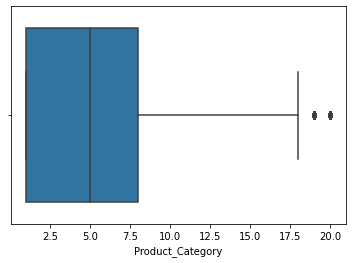

In [49]:
sns.boxplot(x = df['Product_Category'])
y = (np.where(df["Product_Category"]>18))
print(len(y[0]), "Outliers present for Product_Category variable \n")
print("Outliers for Product_Category:")
for i in y:
    for j in i:
        print(df["Product_Category"].iloc[[j]])
        
## 4153 Outliers present for Product_Category variables greater than 18 

3541 Outliers present for Purchase variable 

Outliers for Purchase:
343    23603
Name: Purchase, dtype: int64
375    23792
Name: Purchase, dtype: int64
652    23233
Name: Purchase, dtype: int64
731    21002
Name: Purchase, dtype: int64
736    23595
Name: Purchase, dtype: int64
1041    23341
Name: Purchase, dtype: int64
1179    21224
Name: Purchase, dtype: int64
1445    23826
Name: Purchase, dtype: int64
1772    21053
Name: Purchase, dtype: int64
1902    23139
Name: Purchase, dtype: int64
1928    21264
Name: Purchase, dtype: int64
2958    21233
Name: Purchase, dtype: int64
3025    21179
Name: Purchase, dtype: int64
3166    23159
Name: Purchase, dtype: int64
3167    23741
Name: Purchase, dtype: int64
3172    23728
Name: Purchase, dtype: int64
3391    23239
Name: Purchase, dtype: int64
3630    23424
Name: Purchase, dtype: int64
3908    23395
Name: Purchase, dtype: int64
4148    23384
Name: Purchase, dtype: int64
4221    21518
Name: Purchase, dtype: int64
4527    21544
Name: Purchase, dty

44158    21546
Name: Purchase, dtype: int64
44200    21317
Name: Purchase, dtype: int64
44201    21489
Name: Purchase, dtype: int64
44699    23642
Name: Purchase, dtype: int64
44821    23565
Name: Purchase, dtype: int64
44977    23463
Name: Purchase, dtype: int64
45161    23171
Name: Purchase, dtype: int64
45465    23787
Name: Purchase, dtype: int64
45466    23881
Name: Purchase, dtype: int64
45743    23479
Name: Purchase, dtype: int64
45770    21326
Name: Purchase, dtype: int64
45771    21246
Name: Purchase, dtype: int64
46074    23816
Name: Purchase, dtype: int64
46089    23594
Name: Purchase, dtype: int64
46105    21198
Name: Purchase, dtype: int64
46162    21179
Name: Purchase, dtype: int64
46285    23309
Name: Purchase, dtype: int64
46304    23297
Name: Purchase, dtype: int64
46324    23897
Name: Purchase, dtype: int64
46422    23899
Name: Purchase, dtype: int64
46530    23425
Name: Purchase, dtype: int64
46717    23390
Name: Purchase, dtype: int64
46923    23949
Name: Purchase, d

Name: Purchase, dtype: int64
85593    21177
Name: Purchase, dtype: int64
85595    23558
Name: Purchase, dtype: int64
85608    23868
Name: Purchase, dtype: int64
85793    23847
Name: Purchase, dtype: int64
85797    23144
Name: Purchase, dtype: int64
85844    23598
Name: Purchase, dtype: int64
86185    23144
Name: Purchase, dtype: int64
86432    23475
Name: Purchase, dtype: int64
86654    21274
Name: Purchase, dtype: int64
86747    23270
Name: Purchase, dtype: int64
86895    21427
Name: Purchase, dtype: int64
86952    23426
Name: Purchase, dtype: int64
87122    23780
Name: Purchase, dtype: int64
87219    21011
Name: Purchase, dtype: int64
87440    23961
Name: Purchase, dtype: int64
87461    23418
Name: Purchase, dtype: int64
87757    23556
Name: Purchase, dtype: int64
87850    23057
Name: Purchase, dtype: int64
87874    23535
Name: Purchase, dtype: int64
87876    21528
Name: Purchase, dtype: int64
87979    23199
Name: Purchase, dtype: int64
88388    21070
Name: Purchase, dtype: int64
884

Name: Purchase, dtype: int64
130741    23178
Name: Purchase, dtype: int64
130827    21536
Name: Purchase, dtype: int64
130972    21263
Name: Purchase, dtype: int64
131170    21192
Name: Purchase, dtype: int64
131171    21494
Name: Purchase, dtype: int64
131286    23893
Name: Purchase, dtype: int64
131311    23815
Name: Purchase, dtype: int64
131335    21028
Name: Purchase, dtype: int64
131715    23686
Name: Purchase, dtype: int64
131809    23720
Name: Purchase, dtype: int64
131825    21324
Name: Purchase, dtype: int64
131901    21337
Name: Purchase, dtype: int64
131948    23151
Name: Purchase, dtype: int64
132017    23701
Name: Purchase, dtype: int64
132161    21449
Name: Purchase, dtype: int64
132321    23949
Name: Purchase, dtype: int64
132816    23525
Name: Purchase, dtype: int64
132965    23171
Name: Purchase, dtype: int64
133193    21533
Name: Purchase, dtype: int64
133201    23446
Name: Purchase, dtype: int64
133203    23451
Name: Purchase, dtype: int64
133330    23788
Name: Purc

Name: Purchase, dtype: int64
177286    23363
Name: Purchase, dtype: int64
177469    23671
Name: Purchase, dtype: int64
177975    21221
Name: Purchase, dtype: int64
178856    21218
Name: Purchase, dtype: int64
178931    23496
Name: Purchase, dtype: int64
179461    23913
Name: Purchase, dtype: int64
179462    23125
Name: Purchase, dtype: int64
179798    23699
Name: Purchase, dtype: int64
180141    21336
Name: Purchase, dtype: int64
180339    21074
Name: Purchase, dtype: int64
180440    21331
Name: Purchase, dtype: int64
180496    23091
Name: Purchase, dtype: int64
180915    21035
Name: Purchase, dtype: int64
180993    23087
Name: Purchase, dtype: int64
181347    23546
Name: Purchase, dtype: int64
181528    23676
Name: Purchase, dtype: int64
181616    23837
Name: Purchase, dtype: int64
181864    21105
Name: Purchase, dtype: int64
182294    21270
Name: Purchase, dtype: int64
182455    23105
Name: Purchase, dtype: int64
182601    23760
Name: Purchase, dtype: int64
182654    23222
Name: Purc

Name: Purchase, dtype: int64
225464    23257
Name: Purchase, dtype: int64
225832    21533
Name: Purchase, dtype: int64
225873    23343
Name: Purchase, dtype: int64
225879    21024
Name: Purchase, dtype: int64
225995    23099
Name: Purchase, dtype: int64
226102    23301
Name: Purchase, dtype: int64
226212    23581
Name: Purchase, dtype: int64
226358    23085
Name: Purchase, dtype: int64
226415    23400
Name: Purchase, dtype: int64
226534    23308
Name: Purchase, dtype: int64
226613    23099
Name: Purchase, dtype: int64
226689    21164
Name: Purchase, dtype: int64
226752    23844
Name: Purchase, dtype: int64
226910    23726
Name: Purchase, dtype: int64
226976    21367
Name: Purchase, dtype: int64
226978    23900
Name: Purchase, dtype: int64
227267    23207
Name: Purchase, dtype: int64
227347    23895
Name: Purchase, dtype: int64
227423    23897
Name: Purchase, dtype: int64
227491    21505
Name: Purchase, dtype: int64
227562    23096
Name: Purchase, dtype: int64
227619    23813
Name: Purc

Name: Purchase, dtype: int64
266510    23530
Name: Purchase, dtype: int64
266516    23472
Name: Purchase, dtype: int64
266606    23364
Name: Purchase, dtype: int64
266635    23193
Name: Purchase, dtype: int64
266638    23097
Name: Purchase, dtype: int64
266670    21513
Name: Purchase, dtype: int64
266699    23639
Name: Purchase, dtype: int64
266704    23632
Name: Purchase, dtype: int64
266721    21370
Name: Purchase, dtype: int64
266797    22814
Name: Purchase, dtype: int64
266814    23695
Name: Purchase, dtype: int64
267073    23793
Name: Purchase, dtype: int64
267090    23944
Name: Purchase, dtype: int64
267124    23291
Name: Purchase, dtype: int64
267382    23062
Name: Purchase, dtype: int64
267408    21302
Name: Purchase, dtype: int64
267413    23192
Name: Purchase, dtype: int64
267481    21563
Name: Purchase, dtype: int64
267482    23806
Name: Purchase, dtype: int64
267583    23931
Name: Purchase, dtype: int64
267585    21062
Name: Purchase, dtype: int64
267706    23140
Name: Purc

Name: Purchase, dtype: int64
306665    23926
Name: Purchase, dtype: int64
306709    23498
Name: Purchase, dtype: int64
306861    21371
Name: Purchase, dtype: int64
306883    21042
Name: Purchase, dtype: int64
306999    23138
Name: Purchase, dtype: int64
307048    23340
Name: Purchase, dtype: int64
307053    21468
Name: Purchase, dtype: int64
307150    23582
Name: Purchase, dtype: int64
307219    23121
Name: Purchase, dtype: int64
307357    23428
Name: Purchase, dtype: int64
307610    23702
Name: Purchase, dtype: int64
307631    23114
Name: Purchase, dtype: int64
307683    23404
Name: Purchase, dtype: int64
307695    23711
Name: Purchase, dtype: int64
307802    21236
Name: Purchase, dtype: int64
307804    23086
Name: Purchase, dtype: int64
307984    23718
Name: Purchase, dtype: int64
307985    23168
Name: Purchase, dtype: int64
308117    21040
Name: Purchase, dtype: int64
308496    23820
Name: Purchase, dtype: int64
308501    23169
Name: Purchase, dtype: int64
308519    23504
Name: Purc

339964    23287
Name: Purchase, dtype: int64
340449    21565
Name: Purchase, dtype: int64
340716    21302
Name: Purchase, dtype: int64
340749    23916
Name: Purchase, dtype: int64
340905    23161
Name: Purchase, dtype: int64
340962    21445
Name: Purchase, dtype: int64
340972    23045
Name: Purchase, dtype: int64
341101    21033
Name: Purchase, dtype: int64
341175    23893
Name: Purchase, dtype: int64
341364    23645
Name: Purchase, dtype: int64
341724    23337
Name: Purchase, dtype: int64
341752    21203
Name: Purchase, dtype: int64
341881    23919
Name: Purchase, dtype: int64
341987    23411
Name: Purchase, dtype: int64
342015    23950
Name: Purchase, dtype: int64
342068    23911
Name: Purchase, dtype: int64
342117    23395
Name: Purchase, dtype: int64
342755    23277
Name: Purchase, dtype: int64
342822    23247
Name: Purchase, dtype: int64
343211    21370
Name: Purchase, dtype: int64
343249    23121
Name: Purchase, dtype: int64
343336    21055
Name: Purchase, dtype: int64
343620    

Name: Purchase, dtype: int64
376216    23884
Name: Purchase, dtype: int64
376333    23328
Name: Purchase, dtype: int64
377091    23509
Name: Purchase, dtype: int64
377092    23354
Name: Purchase, dtype: int64
377153    23766
Name: Purchase, dtype: int64
377333    21210
Name: Purchase, dtype: int64
377476    23058
Name: Purchase, dtype: int64
377608    23207
Name: Purchase, dtype: int64
377675    21438
Name: Purchase, dtype: int64
377905    21139
Name: Purchase, dtype: int64
378397    23576
Name: Purchase, dtype: int64
378552    21346
Name: Purchase, dtype: int64
378558    23920
Name: Purchase, dtype: int64
378705    23830
Name: Purchase, dtype: int64
378706    21021
Name: Purchase, dtype: int64
378709    23648
Name: Purchase, dtype: int64
379189    23282
Name: Purchase, dtype: int64
379394    21569
Name: Purchase, dtype: int64
379449    21412
Name: Purchase, dtype: int64
379683    23112
Name: Purchase, dtype: int64
379811    21469
Name: Purchase, dtype: int64
379817    23624
Name: Purc

Name: Purchase, dtype: int64
412185    23623
Name: Purchase, dtype: int64
412250    23908
Name: Purchase, dtype: int64
412981    23125
Name: Purchase, dtype: int64
413135    23528
Name: Purchase, dtype: int64
413284    21397
Name: Purchase, dtype: int64
413293    23630
Name: Purchase, dtype: int64
413316    23802
Name: Purchase, dtype: int64
413317    23065
Name: Purchase, dtype: int64
413431    23710
Name: Purchase, dtype: int64
413601    23335
Name: Purchase, dtype: int64
414006    23250
Name: Purchase, dtype: int64
414105    21077
Name: Purchase, dtype: int64
414829    23317
Name: Purchase, dtype: int64
414851    23527
Name: Purchase, dtype: int64
414861    21050
Name: Purchase, dtype: int64
414931    23129
Name: Purchase, dtype: int64
415243    21187
Name: Purchase, dtype: int64
416538    23125
Name: Purchase, dtype: int64
416758    23368
Name: Purchase, dtype: int64
416883    23958
Name: Purchase, dtype: int64
416971    23897
Name: Purchase, dtype: int64
416985    23164
Name: Purc

Name: Purchase, dtype: int64
470510    23137
Name: Purchase, dtype: int64
470525    23683
Name: Purchase, dtype: int64
470578    23867
Name: Purchase, dtype: int64
470734    21329
Name: Purchase, dtype: int64
470766    23596
Name: Purchase, dtype: int64
470875    23338
Name: Purchase, dtype: int64
470877    23184
Name: Purchase, dtype: int64
471035    23608
Name: Purchase, dtype: int64
471193    23047
Name: Purchase, dtype: int64
471362    23258
Name: Purchase, dtype: int64
471503    23554
Name: Purchase, dtype: int64
471690    23074
Name: Purchase, dtype: int64
471769    23498
Name: Purchase, dtype: int64
471774    21423
Name: Purchase, dtype: int64
471970    23646
Name: Purchase, dtype: int64
472145    23779
Name: Purchase, dtype: int64
472148    23369
Name: Purchase, dtype: int64
472355    23895
Name: Purchase, dtype: int64
473128    23441
Name: Purchase, dtype: int64
473163    23518
Name: Purchase, dtype: int64
473190    23784
Name: Purchase, dtype: int64
473249    23728
Name: Purc

Name: Purchase, dtype: int64
499163    23318
Name: Purchase, dtype: int64
499582    21051
Name: Purchase, dtype: int64
499622    23551
Name: Purchase, dtype: int64
499662    23152
Name: Purchase, dtype: int64
500324    21329
Name: Purchase, dtype: int64
500325    23947
Name: Purchase, dtype: int64
500330    23902
Name: Purchase, dtype: int64
500529    21494
Name: Purchase, dtype: int64
500609    21451
Name: Purchase, dtype: int64
501048    23938
Name: Purchase, dtype: int64
501208    21261
Name: Purchase, dtype: int64
501385    21072
Name: Purchase, dtype: int64
501488    23053
Name: Purchase, dtype: int64
501504    23278
Name: Purchase, dtype: int64
501553    23515
Name: Purchase, dtype: int64
501642    23089
Name: Purchase, dtype: int64
501760    21226
Name: Purchase, dtype: int64
501960    23148
Name: Purchase, dtype: int64
502644    21108
Name: Purchase, dtype: int64
502713    21003
Name: Purchase, dtype: int64
502894    23547
Name: Purchase, dtype: int64
502910    21462
Name: Purc

Name: Purchase, dtype: int64
532053    23513
Name: Purchase, dtype: int64
532054    21272
Name: Purchase, dtype: int64
532219    23342
Name: Purchase, dtype: int64
532612    23075
Name: Purchase, dtype: int64
532971    21523
Name: Purchase, dtype: int64
533160    23168
Name: Purchase, dtype: int64
533628    23290
Name: Purchase, dtype: int64
533751    23466
Name: Purchase, dtype: int64
533829    21068
Name: Purchase, dtype: int64
534030    21088
Name: Purchase, dtype: int64
534144    23189
Name: Purchase, dtype: int64
534306    23435
Name: Purchase, dtype: int64
534362    23615
Name: Purchase, dtype: int64
534364    21171
Name: Purchase, dtype: int64
534376    21443
Name: Purchase, dtype: int64
534850    21251
Name: Purchase, dtype: int64
534978    21316
Name: Purchase, dtype: int64
534979    21062
Name: Purchase, dtype: int64
535045    23497
Name: Purchase, dtype: int64
535049    21519
Name: Purchase, dtype: int64
535066    23102
Name: Purchase, dtype: int64
535167    23635
Name: Purc

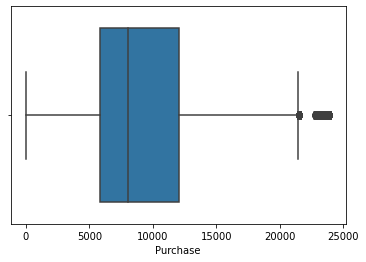

In [65]:
sns.boxplot(x = df['Purchase'])
y = (np.where(df["Purchase"]>21000))
print(len(y[0]), "Outliers present for Purchase variable \n")
print("Outliers for Purchase:")
for i in y:
    for j in i:
        print(df["Purchase"].iloc[[j]])
    
## 3541 Outliers present for Purchase variables greater than 21k

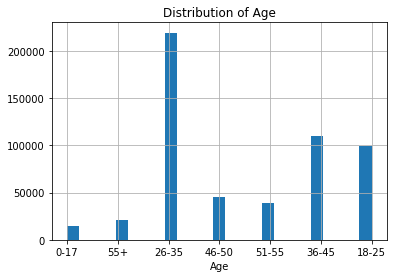

In [52]:
df['Age'].hist(bins=25)
plt.title('Distribution of Age');
plt.xlabel('Age');
## Visualizing 'Age' distribution in the dataset using histogram

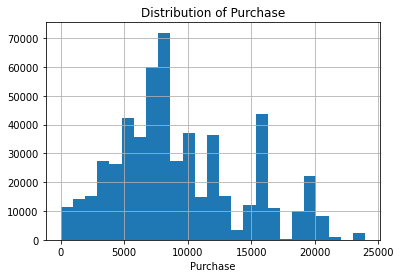

In [54]:
df['Purchase'].hist(bins=25)
plt.title('Distribution of Purchase');
plt.xlabel('Purchase');
## Visualizing 'Purchase' distribution in the dataset using histogram

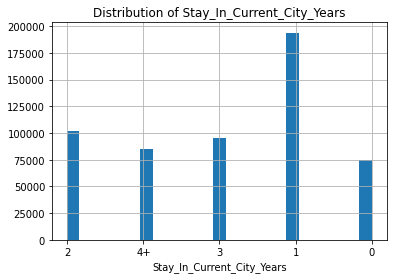

In [192]:
df['Stay_In_Current_City_Years'].hist(bins=25)
plt.title('Distribution of Stay_In_Current_City_Years');
plt.xlabel('Stay_In_Current_City_Years');
## Visualizing 'Stay_In_Current_City_Years' distribution in the dataset using histogram

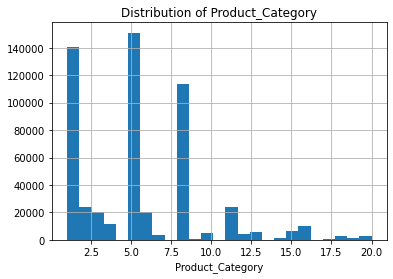

In [56]:
df['Product_Category'].hist(bins=25)
plt.title('Distribution of Product_Category');
plt.xlabel('Product_Category');
## Visualizing 'Product_Category' distribution in the dataset using histogram

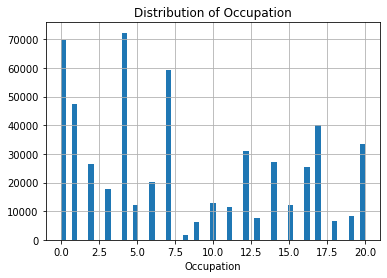

In [66]:
df['Occupation'].hist(bins=55)
plt.title('Distribution of Occupation');
plt.xlabel('Occupation');
## Visualizing 'Occupation' distribution in the dataset using histogram

### 2. Missing Value and Outlier detection

In [11]:
## missing values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [8]:
df.describe()
## 

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [9]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [28]:
## Analyze only numerical varibles in the dataset 
df.describe(include=[np.number])

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


### 4. Answering Questions
#### 1. Are women spending more money per transaction than men? Why or Why not?

In [31]:
df['Gender'].value_counts(normalize=True)*100
## Clearly the dataset is skewed towards Male gender (75%-25%)

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [71]:
## Segregating the Dataset in terms of Gender
Maledf = df[df['Gender'] == 'M']
Maledf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969
5,1000003,P00193542,M,26-35,15,A,3,Single,1,15227
6,1000004,P00184942,M,46-50,7,B,2,Partnered/Married,1,19215
7,1000004,P00346142,M,46-50,7,B,2,Partnered/Married,1,15854
8,1000004,P0097242,M,46-50,7,B,2,Partnered/Married,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,Partnered/Married,19,61
550058,1006024,P00372445,M,26-35,12,A,0,Partnered/Married,20,121
550060,1006026,P00371644,M,36-45,6,C,1,Partnered/Married,20,494
550062,1006032,P00372445,M,46-50,7,A,3,Single,20,473


In [74]:
Femaledf = df[df['Gender'] == 'F']
Femaledf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
14,1000006,P00231342,F,51-55,9,A,1,Single,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,Partnered/Married,20,599
550064,1006035,P00375436,F,26-35,1,C,3,Single,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Partnered/Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Single,20,365


In [121]:
# As the data is skewed and Male customers are 3 times in more number than female we will divide the original number by 3.
print('Amount of purchases from female customers which is over 20,000:',len(Femaledf[Femaledf['Purchase']>20000]))
print('Amount of purchases from male customers which is over 20,000:',len(Maledf[Maledf['Purchase']>20000])//3)
print('\n')
print('Amount of purchases from female customers which is over 21,000:',len(Femaledf[Femaledf['Purchase']>21000]))
print('Amount of purchases from male customers which is over 21,000:',len(Maledf[Maledf['Purchase']>21000])//3)
print('\n')
print('Amount of purchases from female customers which is over 22,000:',len(Femaledf[Femaledf['Purchase']>22000]))
print('Amount of purchases from male customers which is over 22,000:',len(Maledf[Maledf['Purchase']>22000])//3)
print('\n')
print('Amount of purchases from female customers which is over 23,000:',len(Femaledf[Femaledf['Purchase']>23000]))
print('Amount of purchases from male customers which is over 23,000:',len(Maledf[Maledf['Purchase']>23000])//3)
print('\n')
print('Amount of purchases from female customers which is over 23,500:',len(Femaledf[Femaledf['Purchase']>23500]))
print('Amount of purchases from male customers which is over 23,500:',len(Maledf[Maledf['Purchase']>23500])//3)


## From this we can see that as the amount increases more female customers are on-par with male customers in purchase trends.
## but to answer the question female customers are not spending more money than male customers

Amount of purchases from female customers which is over 20,000: 2822
Amount of purchases from male customers which is over 20,000: 3289


Amount of purchases from female customers which is over 21,000: 752
Amount of purchases from male customers which is over 21,000: 929


Amount of purchases from female customers which is over 22,000: 538
Amount of purchases from male customers which is over 22,000: 604


Amount of purchases from female customers which is over 23,000: 532
Amount of purchases from male customers which is over 23,000: 594


Amount of purchases from female customers which is over 23,500: 275
Amount of purchases from male customers which is over 23,500: 282


In [296]:
## Using sample population of 5000 customers both Male and Female

Male = df[df['Gender'] == 'M'].sample(5000)
Female = df[df['Gender'] == 'F'].sample(5000)

In [297]:
print('Amount of purchases from Married customers which is over 20,000:',len(Male[Male['Purchase']>20000]))
print('Amount of purchases from Single customers which is over 20,000:',len(Female[Female['Purchase']>20000]))
print('\n')
print('Amount of purchases from Married customers which is over 21,000:',len(Male[Male['Purchase']>21000]))
print('Amount of purchases from Single customers which is over 21,000:',len(Female[Female['Purchase']>21000]))
print('\n')
print('Amount of purchases from Married customers which is over 22,000:',len(Male[Male['Purchase']>22000]))
print('Amount of purchases from Single customers which is over 22,000:',len(Female[Female['Purchase']>22000]))
print('\n')
print('Amount of purchases from Married customers which is over 23,000:',len(Male[Male['Purchase']>23000]))
print('Amount of purchases from Single customers which is over 23,000:',len(Female[Female['Purchase']>23000]))
print('\n')
print('Amount of purchases from Married customers which is over 23,500:',len(Male[Male['Purchase']>23500]))
print('Amount of purchases from Single customers which is over 23,500:',len(Female[Female['Purchase']>23500]))

Amount of purchases from Married customers which is over 20,000: 148
Amount of purchases from Single customers which is over 20,000: 118


Amount of purchases from Married customers which is over 21,000: 44
Amount of purchases from Single customers which is over 21,000: 30


Amount of purchases from Married customers which is over 22,000: 30
Amount of purchases from Single customers which is over 22,000: 22


Amount of purchases from Married customers which is over 23,000: 30
Amount of purchases from Single customers which is over 23,000: 22


Amount of purchases from Married customers which is over 23,500: 14
Amount of purchases from Single customers which is over 23,500: 9


#### 2. Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [142]:
import numpy as np
import scipy.stats as st

In [179]:
## Confidence interval of 85% for male customers
print('Distribution of the mean of the expenses by male customers at 85% CI:',st.t.interval(alpha=0.85, df=len(Maledf['Purchase'])-1, loc=np.mean(Maledf['Purchase']), scale=st.sem(Maledf['Purchase'])))
print('Distribution of the mean of the expenses by female customers at 85% CI:',st.t.interval(alpha=0.85, df=len(Femaledf['Purchase'])-1, loc=np.mean(Femaledf['Purchase']), scale=st.sem(Femaledf['Purchase'])))
print('\n')## Confidence interval of 90% for male customers
print('Distribution of the mean of the expenses by male customers at 90% CI:',st.t.interval(alpha=0.90, df=len(Maledf['Purchase'])-1, loc=np.mean(Maledf['Purchase']), scale=st.sem(Maledf['Purchase'])))
print('Distribution of the mean of the expenses by female customers at 90% CI:',st.t.interval(alpha=0.90, df=len(Femaledf['Purchase'])-1, loc=np.mean(Femaledf['Purchase']), scale=st.sem(Femaledf['Purchase'])))
print('\n')## Confidence interval of 95% for male customers
print('Distribution of the mean of the expenses by male customers at 95% CI:',st.t.interval(alpha=0.95, df=len(Maledf['Purchase'])-1, loc=np.mean(Maledf['Purchase']), scale=st.sem(Maledf['Purchase'])))
print('Distribution of the mean of the expenses by female customers at 95% CI:',st.t.interval(alpha=0.95, df=len(Femaledf['Purchase'])-1, loc=np.mean(Femaledf['Purchase']), scale=st.sem(Femaledf['Purchase'])))
print('\n')## Confidence interval of 99% for male customers
print('Distribution of the mean of the expenses by male customers at 99% CI:',st.t.interval(alpha=0.99, df=len(Maledf['Purchase'])-1, loc=np.mean(Maledf['Purchase']), scale=st.sem(Maledf['Purchase'])))
print('Distribution of the mean of the expenses by female customers at 99% CI:',st.t.interval(alpha=0.99, df=len(Femaledf['Purchase'])-1, loc=np.mean(Femaledf['Purchase']), scale=st.sem(Femaledf['Purchase'])))
print('\n')

Distribution of the mean of the expenses by male customers at 85% CI: (9426.136917839636, 9448.915163104894)
Distribution of the mean of the expenses by female customers at 85% CI: (8715.943789722198, 8753.187740588754)


Distribution of the mean of the expenses by male customers at 90% CI: (9424.512468203842, 9450.539612740688)
Distribution of the mean of the expenses by female customers at 90% CI: (8713.287689504074, 8755.843840806878)


Distribution of the mean of the expenses by male customers at 95% CI: (9422.019402055814, 9453.032678888716)
Distribution of the mean of the expenses by female customers at 95% CI: (8709.21132117373, 8759.92020913722)


Distribution of the mean of the expenses by male customers at 99% CI: (9417.14682877079, 9457.90525217374)
Distribution of the mean of the expenses by female customers at 99% CI: (8701.24420611832, 8767.887324192632)




In [299]:
## Confidence interval of 85% for male customers
print('Distribution of the mean of the expenses by male customers at 85% CI:',st.t.interval(alpha=0.85, df=len(Male['Purchase'])-1, loc=np.mean(Male['Purchase']), scale=st.sem(Male['Purchase'])))
print('Distribution of the mean of the expenses by female customers at 85% CI:',st.t.interval(alpha=0.85, df=len(Female['Purchase'])-1, loc=np.mean(Female['Purchase']), scale=st.sem(Female['Purchase'])))
print('\n')## Confidence interval of 90% for male customers
print('Distribution of the mean of the expenses by male customers at 90% CI:',st.t.interval(alpha=0.90, df=len(Male['Purchase'])-1, loc=np.mean(Male['Purchase']), scale=st.sem(Male['Purchase'])))
print('Distribution of the mean of the expenses by female customers at 90% CI:',st.t.interval(alpha=0.90, df=len(Female['Purchase'])-1, loc=np.mean(Female['Purchase']), scale=st.sem(Female['Purchase'])))
print('\n')## Confidence interval of 95% for male customers
print('Distribution of the mean of the expenses by male customers at 95% CI:',st.t.interval(alpha=0.95, df=len(Male['Purchase'])-1, loc=np.mean(Male['Purchase']), scale=st.sem(Male['Purchase'])))
print('Distribution of the mean of the expenses by female customers at 95% CI:',st.t.interval(alpha=0.95, df=len(Female['Purchase'])-1, loc=np.mean(Female['Purchase']), scale=st.sem(Female['Purchase'])))
print('\n')## Confidence interval of 99% for male customers
print('Distribution of the mean of the expenses by male customers at 99% CI:',st.t.interval(alpha=0.99, df=len(Male['Purchase'])-1, loc=np.mean(Male['Purchase']), scale=st.sem(Male['Purchase'])))
print('Distribution of the mean of the expenses by female customers at 99% CI:',st.t.interval(alpha=0.99, df=len(Female['Purchase'])-1, loc=np.mean(Female['Purchase']), scale=st.sem(Female['Purchase'])))
print('\n')

Distribution of the mean of the expenses by male customers at 85% CI: (9448.849233528757, 9656.707166471244)
Distribution of the mean of the expenses by female customers at 85% CI: (8682.571603965418, 8880.428396034582)


Distribution of the mean of the expenses by male customers at 90% CI: (9434.021954686117, 9671.534445313884)
Distribution of the mean of the expenses by female customers at 90% CI: (8668.457743669638, 8894.542256330362)


Distribution of the mean of the expenses by male customers at 95% CI: (9411.263365382954, 9694.293034617047)
Distribution of the mean of the expenses by female customers at 95% CI: (8646.794190069357, 8916.205809930643)


Distribution of the mean of the expenses by male customers at 99% CI: (9366.770191395182, 9738.786208604819)
Distribution of the mean of the expenses by female customers at 99% CI: (8604.441817227125, 8958.558182772875)




In [196]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [201]:
df.sample(500).groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,131.0,9419.916031,5358.582938,718.0,5876.0,7984.0,12057.0,23515.0
M,369.0,9380.298103,4881.382744,13.0,5912.0,8036.0,12397.0,23728.0


In [208]:
male_expense_mean=[df[df['Gender']=='M']['Purchase'].sample(500).mean() for i in range(1000)]

In [207]:
female_expense_mean=[df[df['Gender']=='F']['Purchase'].sample(500).mean() for i in range(1000)]

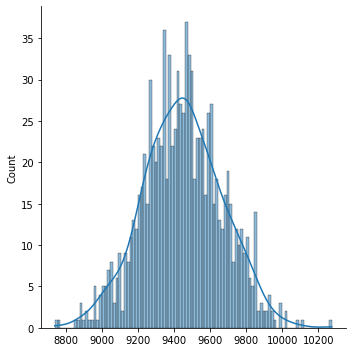

In [209]:
sns.displot(male_expense_mean,bins=100, kde=True)

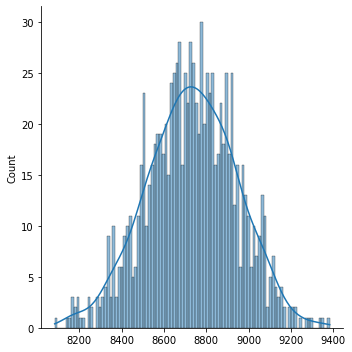

In [210]:
sns.displot(female_expense_mean,bins=100, kde=True)

#### As the CI increase we can see wider confidence interval that is more likely to contain the actual mean value

#### Results with different CI for Married vs Unmarried

In [211]:
## Segregating the Dataset in terms of Gender
Singledf = df[df['Marital_Status'] == 'Single']
Singledf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969
...,...,...,...,...,...,...,...,...,...,...
550056,1006022,P00375436,M,26-35,17,C,4+,Single,20,254
550059,1006025,P00370853,F,26-35,1,B,1,Single,19,48
550062,1006032,P00372445,M,46-50,7,A,3,Single,20,473
550064,1006035,P00375436,F,26-35,1,C,3,Single,20,371


In [214]:
Marriedf = df[df['Marital_Status'] == 'Partnered/Married']
Marriedf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,Partnered/Married,1,19215
7,1000004,P00346142,M,46-50,7,B,2,Partnered/Married,1,15854
8,1000004,P0097242,M,46-50,7,B,2,Partnered/Married,1,15686
9,1000005,P00274942,M,26-35,20,A,1,Partnered/Married,8,7871
10,1000005,P00251242,M,26-35,20,A,1,Partnered/Married,5,5254
...,...,...,...,...,...,...,...,...,...,...
550060,1006026,P00371644,M,36-45,6,C,1,Partnered/Married,20,494
550061,1006029,P00372445,F,26-35,1,C,1,Partnered/Married,20,599
550063,1006033,P00372445,M,51-55,13,B,1,Partnered/Married,20,368
550065,1006036,P00375436,F,26-35,15,B,4+,Partnered/Married,20,137


In [216]:
print('Amount of purchases from Married customers which is over 20,000:',len(Marriedf[Marriedf['Purchase']>20000]))
print('Amount of purchases from Single customers which is over 20,000:',len(Singledf[Singledf['Purchase']>20000]))
print('\n')
print('Amount of purchases from Married customers which is over 21,000:',len(Marriedf[Marriedf['Purchase']>21000]))
print('Amount of purchases from Single customers which is over 21,000:',len(Singledf[Singledf['Purchase']>21000]))
print('\n')
print('Amount of purchases from Married customers which is over 22,000:',len(Marriedf[Marriedf['Purchase']>22000]))
print('Amount of purchases from Single customers which is over 22,000:',len(Singledf[Singledf['Purchase']>22000]))
print('\n')
print('Amount of purchases from Married customers which is over 23,000:',len(Marriedf[Marriedf['Purchase']>23000]))
print('Amount of purchases from Single customers which is over 23,000:',len(Singledf[Singledf['Purchase']>23000]))
print('\n')
print('Amount of purchases from Married customers which is over 23,500:',len(Marriedf[Marriedf['Purchase']>23500]))
print('Amount of purchases from Single customers which is over 23,500:',len(Singledf[Singledf['Purchase']>23500]))


Amount of purchases from Married customers which is over 20,000: 5269
Amount of purchases from Single customers which is over 20,000: 7422


Amount of purchases from Married customers which is over 21,000: 1567
Amount of purchases from Single customers which is over 21,000: 1974


Amount of purchases from Married customers which is over 22,000: 1047
Amount of purchases from Single customers which is over 22,000: 1303


Amount of purchases from Married customers which is over 23,000: 1037
Amount of purchases from Single customers which is over 23,000: 1278


Amount of purchases from Married customers which is over 23,500: 512
Amount of purchases from Single customers which is over 23,500: 611


In [217]:
## Confidence interval of 85% for male customers
print('Distribution of the mean of the expenses by Single customers at 85% CI:',st.t.interval(alpha=0.85, df=len(Singledf['Purchase'])-1, loc=np.mean(Singledf['Purchase']), scale=st.sem(Singledf['Purchase'])))
print('Distribution of the mean of the expenses by Married customers at 85% CI:',st.t.interval(alpha=0.85, df=len(Marriedf['Purchase'])-1, loc=np.mean(Marriedf['Purchase']), scale=st.sem(Marriedf['Purchase'])))
print('\n')## Confidence interval of 90% for male customers
print('Distribution of the mean of the expenses by Single customers at 90% CI:',st.t.interval(alpha=0.90, df=len(Singledf['Purchase'])-1, loc=np.mean(Singledf['Purchase']), scale=st.sem(Singledf['Purchase'])))
print('Distribution of the mean of the expenses by Married customers at 90% CI:',st.t.interval(alpha=0.90, df=len(Marriedf['Purchase'])-1, loc=np.mean(Marriedf['Purchase']), scale=st.sem(Marriedf['Purchase'])))
print('\n')## Confidence interval of 95% for male customers
print('Distribution of the mean of the expenses by Single customers at 95% CI:',st.t.interval(alpha=0.95, df=len(Singledf['Purchase'])-1, loc=np.mean(Singledf['Purchase']), scale=st.sem(Singledf['Purchase'])))
print('Distribution of the mean of the expenses by Married customers at 95% CI:',st.t.interval(alpha=0.95, df=len(Marriedf['Purchase'])-1, loc=np.mean(Marriedf['Purchase']), scale=st.sem(Marriedf['Purchase'])))
print('\n')## Confidence interval of 99% for male customers
print('Distribution of the mean of the expenses by Single customers at 99% CI:',st.t.interval(alpha=0.99, df=len(Singledf['Purchase'])-1, loc=np.mean(Singledf['Purchase']), scale=st.sem(Singledf['Purchase'])))
print('Distribution of the mean of the expenses by Married customers at 99% CI:',st.t.interval(alpha=0.99, df=len(Marriedf['Purchase'])-1, loc=np.mean(Marriedf['Purchase']), scale=st.sem(Marriedf['Purchase'])))
print('\n')

Distribution of the mean of the expenses by Single customers at 85% CI: (9253.207749588102, 9278.607488254911)
Distribution of the mean of the expenses by Married customers at 85% CI: (9245.960637290831, 9276.388510873916)


Distribution of the mean of the expenses by Single customers at 90% CI: (9251.396344426079, 9280.418893416934)
Distribution of the mean of the expenses by Married customers at 90% CI: (9243.79064243542, 9278.558505729326)


Distribution of the mean of the expenses by Single customers at 95% CI: (9248.616353737028, 9283.198884105985)
Distribution of the mean of the expenses by Married customers at 95% CI: (9240.460315792989, 9281.888832371758)


Distribution of the mean of the expenses by Single customers at 99% CI: (9243.182995563593, 9288.63224227942)
Distribution of the mean of the expenses by Married customers at 99% CI: (9233.951339733765, 9288.397808430982)




In [219]:
df.sample(500).groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Partnered/Married,206.0,9582.810680,5163.825595,576.0,6060.75,8225.5,12089.75,23391.0
Single,294.0,9024.612245,5000.603033,247.0,5397.00,7907.5,11892.75,23718.0


In [220]:
single_expense_mean=[df[df['Marital_Status']=='Single']['Purchase'].sample(500).mean() for i in range(1000)]

In [221]:
married_expense_mean=[df[df['Marital_Status']=='Partnered/Married']['Purchase'].sample(500).mean() for i in range(1000)]

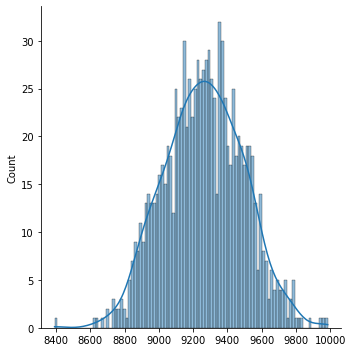

In [222]:
sns.displot(single_expense_mean,bins=100, kde=True)

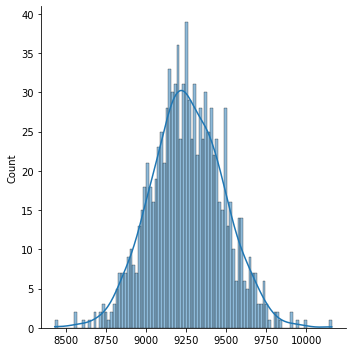

In [223]:
sns.displot(married_expense_mean,bins=100, kde=True)

#### Results with different CI for Age categories

In [266]:
## I am going to categorize the Age variables into 3 buckets teenager, adult, seniors
df['Age'].replace({'0-17': "Teenager", '18-25': "Teenager", '26-35': "Adult", '36-45':"Adult", '46-50':"Adult", '51-55':"Senior", '55+' :"Senior"}, inplace=True)
print(df['Age'].value_counts())

Adult       375301
Teenager    114762
Senior       60005
Name: Age, dtype: int64


In [267]:
Teendf = df[df['Age'] == 'Teenager']
Teendf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,Teenager,10,A,2,Single,3,8370
1,1000001,P00248942,F,Teenager,10,A,2,Single,1,15200
2,1000001,P00087842,F,Teenager,10,A,2,Single,12,1422
3,1000001,P00085442,F,Teenager,10,A,2,Single,12,1057
70,1000018,P00366542,F,Teenager,3,B,3,Single,5,1780
...,...,...,...,...,...,...,...,...,...,...
550020,1005964,P00370293,M,Teenager,5,B,1,Single,19,36
550024,1005973,P00370293,M,Teenager,10,C,4+,Single,19,12
550032,1005985,P00375436,F,Teenager,4,C,0,Partnered/Married,20,491
550035,1005989,P00370853,F,Teenager,10,C,3,Single,19,61


In [268]:
Adultdf = df[df['Age'] == 'Adult']
Adultdf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
5,1000003,P00193542,M,Adult,15,A,3,Single,1,15227
6,1000004,P00184942,M,Adult,7,B,2,Partnered/Married,1,19215
7,1000004,P00346142,M,Adult,7,B,2,Partnered/Married,1,15854
8,1000004,P0097242,M,Adult,7,B,2,Partnered/Married,1,15686
9,1000005,P00274942,M,Adult,20,A,1,Partnered/Married,8,7871
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,Adult,1,C,1,Partnered/Married,20,599
550062,1006032,P00372445,M,Adult,7,A,3,Single,20,473
550064,1006035,P00375436,F,Adult,1,C,3,Single,20,371
550065,1006036,P00375436,F,Adult,15,B,4+,Partnered/Married,20,137


In [269]:
Seniordf = df[df['Age'] == 'Senior']
Seniordf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,Senior,16,C,4+,Single,8,7969
14,1000006,P00231342,F,Senior,9,A,1,Single,5,5378
15,1000006,P00190242,F,Senior,9,A,1,Single,4,2079
16,1000006,P0096642,F,Senior,9,A,1,Single,2,13055
17,1000006,P00058442,F,Senior,9,A,1,Single,5,8851
...,...,...,...,...,...,...,...,...,...,...
550030,1005980,P00372445,M,Senior,1,C,3,Single,20,376
550037,1005993,P00370293,F,Senior,20,C,1,Partnered/Married,19,62
550042,1006002,P00371644,M,Senior,0,C,1,Partnered/Married,20,243
550063,1006033,P00372445,M,Senior,13,B,1,Partnered/Married,20,368


In [270]:
print('Amount of purchases from Teenage customers which is over 20,000:',len(Teendf[Teendf['Purchase']>20000]))
print('Amount of purchases from Adult customers which is over 20,000:',len(Adultdf[Adultdf['Purchase']>20000]))
print('Amount of purchases from Senior customers which is over 20,000:',len(Seniordf[Seniordf['Purchase']>20000]))
print('\n')
print('Amount of purchases from Teenage customers which is over 21,000:',len(Teendf[Teendf['Purchase']>21000]))
print('Amount of purchases from Adult customers which is over 21,000:',len(Adultdf[Adultdf['Purchase']>21000]))
print('Amount of purchases from Senior customers which is over 21,000:',len(Seniordf[Seniordf['Purchase']>21000]))
print('\n')
print('Amount of purchases from Teenage customers which is over 22,000:',len(Teendf[Teendf['Purchase']>22000]))
print('Amount of purchases from Adult customers which is over 22,000:',len(Adultdf[Adultdf['Purchase']>22000]))
print('Amount of purchases from Senior customers which is over 22,000:',len(Seniordf[Seniordf['Purchase']>22000]))
print('\n')
print('Amount of purchases from Teenage customers which is over 23,000:',len(Teendf[Teendf['Purchase']>23000]))
print('Amount of purchases from Adult customers which is over 23,000:',len(Adultdf[Adultdf['Purchase']>23000]))
print('Amount of purchases from Senior customers which is over 23,000:',len(Seniordf[Seniordf['Purchase']>23000]))
print('\n')
print('Amount of purchases from Teenage customers which is over 23,500:',len(Teendf[Teendf['Purchase']>23500]))
print('Amount of purchases from Adult customers which is over 23,500:',len(Adultdf[Adultdf['Purchase']>23500]))
print('Amount of purchases from Senior customers which is over 23,500:',len(Seniordf[Seniordf['Purchase']>23500]))

Amount of purchases from Teenage customers which is over 20,000: 2353
Amount of purchases from Adult customers which is over 20,000: 8596
Amount of purchases from Senior customers which is over 20,000: 1742


Amount of purchases from Teenage customers which is over 21,000: 547
Amount of purchases from Adult customers which is over 21,000: 2367
Amount of purchases from Senior customers which is over 21,000: 627


Amount of purchases from Teenage customers which is over 22,000: 318
Amount of purchases from Adult customers which is over 22,000: 1586
Amount of purchases from Senior customers which is over 22,000: 446


Amount of purchases from Teenage customers which is over 23,000: 311
Amount of purchases from Adult customers which is over 23,000: 1561
Amount of purchases from Senior customers which is over 23,000: 443


Amount of purchases from Teenage customers which is over 23,500: 146
Amount of purchases from Adult customers which is over 23,500: 745
Amount of purchases from Senior cu

In [271]:
## Confidence interval of 85% for male customers
print('Distribution of the mean of the expenses by Adult customers at 85% CI:',st.t.interval(alpha=0.85, df=len(Adultdf['Purchase'])-1, loc=np.mean(Adultdf['Purchase']), scale=st.sem(Adultdf['Purchase'])))
print('Distribution of the mean of the expenses by Teenage customers at 85% CI:',st.t.interval(alpha=0.85, df=len(Teendf['Purchase'])-1, loc=np.mean(Teendf['Purchase']), scale=st.sem(Teendf['Purchase'])))
print('Distribution of the mean of the expenses by Senior customers at 85% CI:',st.t.interval(alpha=0.85, df=len(Seniordf['Purchase'])-1, loc=np.mean(Seniordf['Purchase']), scale=st.sem(Seniordf['Purchase'])))
print('\n')## Confidence interval of 90% for male customers
print('Distribution of the mean of the expenses by Adult customers at 90% CI:',st.t.interval(alpha=0.90, df=len(Adultdf['Purchase'])-1, loc=np.mean(Adultdf['Purchase']), scale=st.sem(Adultdf['Purchase'])))
print('Distribution of the mean of the expenses by Teenage customers at 90% CI:',st.t.interval(alpha=0.90, df=len(Teendf['Purchase'])-1, loc=np.mean(Teendf['Purchase']), scale=st.sem(Teendf['Purchase'])))
print('Distribution of the mean of the expenses by Senior customers at 90% CI:',st.t.interval(alpha=0.90, df=len(Seniordf['Purchase'])-1, loc=np.mean(Seniordf['Purchase']), scale=st.sem(Seniordf['Purchase'])))
print('\n')## Confidence interval of 95% for male customers
print('Distribution of the mean of the expenses by Adult customers at 95% CI:',st.t.interval(alpha=0.95, df=len(Adultdf['Purchase'])-1, loc=np.mean(Adultdf['Purchase']), scale=st.sem(Adultdf['Purchase'])))
print('Distribution of the mean of the expenses by Teenage customers at 95% CI:',st.t.interval(alpha=0.95, df=len(Teendf['Purchase'])-1, loc=np.mean(Teendf['Purchase']), scale=st.sem(Teendf['Purchase'])))
print('Distribution of the mean of the expenses by Senior customers at 95% CI:',st.t.interval(alpha=0.95, df=len(Seniordf['Purchase'])-1, loc=np.mean(Seniordf['Purchase']), scale=st.sem(Seniordf['Purchase'])))
print('\n')## Confidence interval of 99% for male customers
print('Distribution of the mean of the expenses by Adult customers at 99% CI:',st.t.interval(alpha=0.99, df=len(Adultdf['Purchase'])-1, loc=np.mean(Adultdf['Purchase']), scale=st.sem(Adultdf['Purchase'])))
print('Distribution of the mean of the expenses by Teenage customers at 99% CI:',st.t.interval(alpha=0.99, df=len(Teendf['Purchase'])-1, loc=np.mean(Teendf['Purchase']), scale=st.sem(Teendf['Purchase'])))
print('Distribution of the mean of the expenses by Senior customers at 99% CI:',st.t.interval(alpha=0.99, df=len(Seniordf['Purchase'])-1, loc=np.mean(Seniordf['Purchase']), scale=st.sem(Seniordf['Purchase'])))
print('\n')

Distribution of the mean of the expenses by Adult customers at 85% CI: (9258.612255163245, 9282.152970615529)
Distribution of the mean of the expenses by Teenage customers at 85% CI: (9117.142685261355, 9160.019755267742)
Distribution of the mean of the expenses by Senior customers at 85% CI: (9433.918786027316, 9493.404570359653)


Distribution of the mean of the expenses by Adult customers at 90% CI: (9256.933428793996, 9283.831796984778)
Distribution of the mean of the expenses by Teenage customers at 90% CI: (9114.084846675192, 9163.077593853905)
Distribution of the mean of the expenses by Senior customers at 90% CI: (9429.676430819733, 9497.646925567236)


Distribution of the mean of the expenses by Adult customers at 95% CI: (9254.35690946973, 9286.408316309044)
Distribution of the mean of the expenses by Teenage customers at 95% CI: (9109.391918549009, 9167.770521980088)
Distribution of the mean of the expenses by Senior customers at 95% CI: (9423.16556655487, 9504.1577898321)



In [272]:
df.sample(500).groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
Adult,346.0,9594.864162,5008.804758,48.0,6080.0,8296.0,12722.75,23761.0
Senior,55.0,10076.109091,5239.201772,746.0,7028.0,8297.0,12520.00,23784.0
Teenager,99.0,9421.323232,5286.655244,119.0,5927.0,8682.0,14207.00,21410.0


In [277]:
Teen_expense_mean=[df[df['Age']=='Teenager']['Purchase'].sample(500).mean() for i in range(1000)]

In [278]:
Adult_expense_mean=[df[df['Age']=='Adult']['Purchase'].sample(500).mean() for i in range(1000)]

In [279]:
Senior_expense_mean=[df[df['Age']=='Senior']['Purchase'].sample(500).mean() for i in range(1000)]

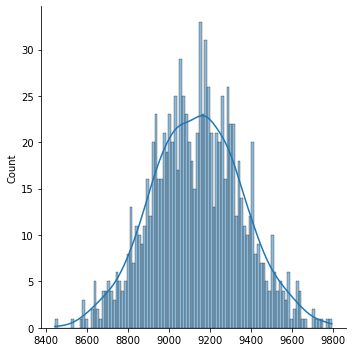

In [280]:
sns.displot(Teen_expense_mean,bins=100, kde=True)

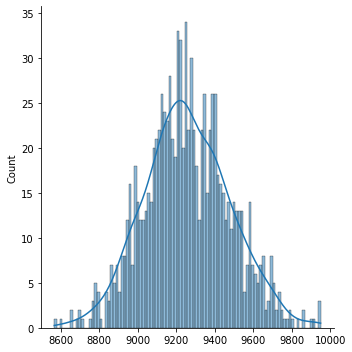

In [281]:
sns.displot(Adult_expense_mean,bins=100, kde=True)

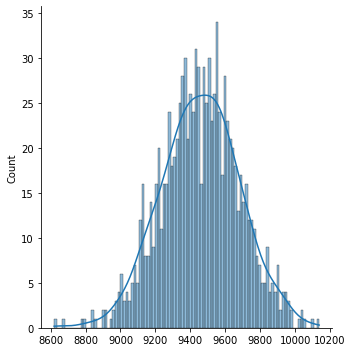

In [282]:
sns.displot(Senior_expense_mean,bins=100, kde=True)

<AxesSubplot:>

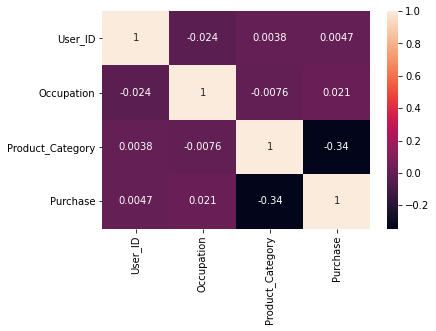

In [283]:
sns.heatmap(df.corr(), annot=True)

### 5. Final Insights

In [285]:
## No null values (550068 rows into 10 columns of variables)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 42.0+ MB


In [286]:
## Dataset is divided into 3 continous variables[Occupation, Product_Category, Purchase] and 5 categorical variables[Age, Gender, City_Category, Stay_In_Current_City_Years, Marital_Status]
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068,550068.000000,550068.000000
unique,NaN,3631,2,3,NaN,3,5,2,NaN,NaN
top,NaN,P00265242,M,Adult,NaN,B,1,Single,NaN,NaN
freq,NaN,1880,414259,375301,NaN,231173,193821,324731,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,8.000000,12054.000000


In [292]:
## As we are finding insights based on purchase patterns of different customers based on Age, Gender,Occupation etc, 
## We have sub divided the dataset 
print('Purchases made by differnt Genders -- Male\n')
print(Maledf['Age'].value_counts(), '\n')
print(Maledf['City_Category'].value_counts(), '\n')
print(Maledf['Occupation'].value_counts().head(), '\n')
print(Maledf['Marital_Status'].value_counts(), '\n\n')

print('Purchases made by differnt Genders -- Female\n')
print(Femaledf['Age'].value_counts(), '\n')
print(Femaledf['City_Category'].value_counts(), '\n')
print(Femaledf['Occupation'].value_counts().head(), '\n')
print(Femaledf['Marital_Status'].value_counts(), '\n\n')

print('Purchases made by differnt Marital_status -- Single\n')
print(Singledf['Age'].value_counts(), '\n')
print(Singledf['City_Category'].value_counts(), '\n')
print(Singledf['Occupation'].value_counts().head(), '\n')

print('Purchases made by differnt Marital_status -- Married\n')
print(Marriedf['Age'].value_counts(), '\n')
print(Marriedf['City_Category'].value_counts(), '\n')
print(Marriedf['Occupation'].value_counts().head(), '\n')

print('Purchases made by differnt Age groups -- Teenagers\n')
print(Teendf['City_Category'].value_counts(), '\n')
print(Teendf['Occupation'].value_counts().head(), '\n')
print(Teendf['Marital_Status'].value_counts(), '\n\n')

print('Purchases made by differnt Age groups -- Adult\n')
print(Adultdf['City_Category'].value_counts(), '\n')
print(Adultdf['Occupation'].value_counts().head(), '\n')
print(Adultdf['Marital_Status'].value_counts(), '\n\n')

print('Purchases made by differnt Age groups -- Senior\n')
print(Seniordf['City_Category'].value_counts(), '\n')
print(Seniordf['Occupation'].value_counts().head(), '\n')
print(Seniordf['Marital_Status'].value_counts(), '\n\n')

Purchases made by differnt Genders -- Male

26-35    168835
36-45     82843
18-25     75032
46-50     32502
51-55     28607
55+       16421
0-17      10019
Name: Age, dtype: int64 

B    173377
C    128866
A    112016
Name: City_Category, dtype: int64 

4     54472
0     51526
7     49105
17    36114
1     29442
Name: Occupation, dtype: int64 

Single               245910
Partnered/Married    168349
Name: Marital_Status, dtype: int64 


Purchases made by differnt Genders -- Female

26-35    50752
36-45    27170
18-25    24628
46-50    13199
51-55     9894
0-17      5083
55+       5083
Name: Age, dtype: int64 

B    57796
C    42309
A    35704
Name: City_Category, dtype: int64 

0     18112
1     17984
4     17836
7     10028
20     8811
Name: Occupation, dtype: int64 

Single               78821
Partnered/Married    56988
Name: Marital_Status, dtype: int64 


Purchases made by differnt Marital_status -- Single

26-35    133296
18-25     78544
36-45     66377
0-17      15102
46-50     1

### 6. Recommendations

In [ ]:
## As we are using the current data to find out the purchase patterns based on all the variables, EDA was done on the full dataset
## as well as sub datasets[divided on different products]

## EDA based on main dataset

## Based on the EDA on the entire dataset, we can see clearly that the data is skewed in terms of gender male population 
## is 3 times to that of female (75-25). Occupation variable is masked so we can understand it as years being employed. 
## Surprisingly when we see in the top 3 we can see 4,0 and 7 years experience in the mix. 
##when it comes to the age variable we can clearly see adult population (26-35 and 36-45) making 60% combined purchases.
## marital status is categorized 0's as single and 1's as married/partnered. using this we have seen 0's (single) at around 60% 
## to 1's (married) at 40%

## Answering the questions

## 1. Are women spending more money per transaction than men.

## As the data is skewed in terms of gender, we can use sample population or other methods to find the solution to this question
## initially i have subdivided the dataset in terms of gender, then we just check male to female ratio interms of purchase
## amounts increasing from 20,000. As male population is high we divide the value by 3. have also made use of sample population.

## 2. Confidence intervals and distribution of the mean of the expenses by female and male customers.

## Confidence intervals and distribution. As the Confidence Interval has increased we have seen wider 
## confidence interval that is more likely to contain the actual mean value. 
## for 85% CI we can see a difference of 22 for male customers. and 38 for female customers.
## for 90% CI we can see a difference of 26 for male customers. and 42 for female customers.
## for 95% CI we can see a difference of 31 for male customers. and 50 for female customers.
## for 99% CI we can see a difference of 40 for male customers. and 66 for female customers.
## when we use a sample size of 5000 we can clearly see a difference of more than 200.

## 4. Results when the same activity is performed for Married vs Unmarried 

## for 85% CI we can see a difference of 25 for single customers. and 31 for married customers.
## for 90% CI we can see a difference of 29 for single customers. and 35 for married customers.
## for 95% CI we can see a difference of 35 for single customers. and 41 for married customers.
## for 99% CI we can see a difference of 45 for single customers. and 55 for married customers.

## 5.Results when the same activity is performed for Age

## We are categorizing all the age categories into 3 buckets Teenager, Adult, Senior.
## for 85% CI we can see a difference of 24 for Adult customers. and 43 for Teenage customers.
## and 60 for Senior customers.
## for 90% CI we can see a difference of 27 for Adult customers. and 49 for Teenage customers.
## and 68 for Senior customers.
## for 95% CI we can see a difference of 32 for Adult customers. and 58 for Teenage customers.
## and 81 for Senior customers.
## for 99% CI we can see a difference of 42 for Adult customers. and 76 for Teenage customers.
## and 106 for Senior customers.


## From all of these analysis we can say that male customers are spending more amount per transaction.
## with Adult population and single population doing more purchasing.

## The average male population has a mean near the average purchase amount. which also hold good for adult customers.
## But this hold good for both single and married customers.

## also when we see what all products are costly, we can clearly see product_category 10 and 9 hold the most valuable products
 


In [313]:
high = df[df['Purchase']>23000]
high['Product_Category'].value_counts()

10    2275
9       40
Name: Product_Category, dtype: int64